<h4>Assignment 2 Santander</h4>
<h5>PRN : </h5>
<h5>Name : </h5>

In [278]:
pwd

'C:\\Users\\duasp\\Machine Learning\\santander'

In [279]:
cd santander/

[WinError 2] The system cannot find the file specified: 'santander/'
C:\Users\duasp\Machine Learning\santander


In [280]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing         import StandardScaler
from sklearn.datasets              import load_digits
from sklearn.metrics               import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection       import train_test_split, RandomizedSearchCV

In [281]:
# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1,
          'scatter.edgecolors': 'b' # edge color of markers
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

<Figure size 1500x700 with 0 Axes>

In [282]:
data_df = pd.read_csv('train.csv') 

In [283]:
data_df.keys()

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [284]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [285]:
data_df.TARGET.value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

In [286]:
class_names = data_df.TARGET.unique()
class_names

array([0, 1], dtype=int64)

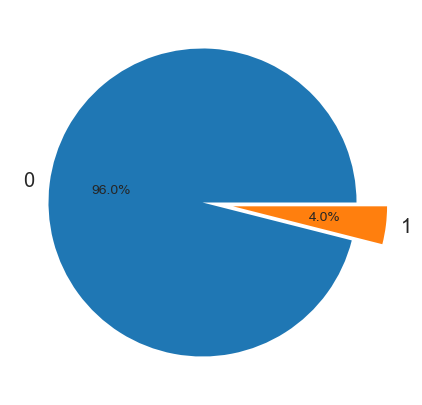

In [287]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0,0.2)
ax.pie(data_df['TARGET'].value_counts(), explode=explode, labels=class_names, autopct='%1.1f%%');

In [288]:
for col in data_df.columns:
    print(f'{col}: {len(data_df[col].unique())}: {data_df[col].unique()}')

ID: 76020: [     1      3      4 ... 151835 151836 151838]
var3: 208: [      2     229     178       0       8       3       4      10     110
       7     177       1       6     137      17 -999999      13      14
     148       5      11      15     122      22       9      58     121
      12     127      33     125     209      72      31      51      16
     107     174     141     191     104     129      18      49      73
      94     131     219     187     114      28      89     115      53
     126      47      84     235     161     197      23      30     146
     158     138      26     120      66     216     215      90      20
      21     103     192     142      29     163     223      95      98
      38     156      97     105     150     183     184      52      54
     220      25     225      86     124      27     162      19     195
     218      24      60     108      82      36     102     175     144
     169      64     201      79      91     159     1

<h4> Feature Engineering</h4>

In [290]:
data_df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [291]:
data_df['n0'] = (data_df == 0).sum(axis = 1)
data_df.shape

(76020, 372)

In [292]:
drop_col = []

for col in data_df.columns:
    if data_df[col].std() == 0:
        drop_col.append(col)

In [293]:
drop_col

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [294]:
drop_col.append('ID')

In [295]:
len(drop_col)

35

In [296]:
data_df.drop(drop_col, axis = 1, inplace= True)

In [297]:
# Remove Duplicate Columns

drop_col=[]

cols = data_df.columns

for i in range(len(cols)-1):
    v = data_df[cols[i]].values
    for j in range(i+1, len(cols)):
        if np.array_equal(v, data_df[cols[j]].values):
            drop_col.append(cols[j])
data_df.drop(drop_col, axis=1, inplace=True)

In [298]:
data_df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,n0
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0,356
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0,330
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0,341
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0,310
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,320


In [299]:
data_df.isnull().sum().sum()

0

In [300]:
feature_df = data_df.drop('TARGET', axis = 1)
labels  = data_df[['TARGET']]

In [301]:
num_cols = feature_df.describe().columns.to_list()
len(num_cols)

307

In [462]:
from_range =125
to_range = 150
feature_df[num_cols[from_range :to_range]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_var44_0,76020.0,0.005683,0.131350,0.00,0.0,0.0,0.000,6.00
num_var44,76020.0,0.005091,0.123477,0.00,0.0,0.0,0.000,3.00
saldo_var1,76020.0,48.449107,10937.473019,-0.90,0.0,0.0,0.000,3000000.00
saldo_var5,76020.0,1028.468235,9852.140073,-2895.72,0.0,3.0,90.000,619329.15
saldo_var6,76020.0,0.414475,83.096797,0.00,0.0,0.0,0.000,19531.80
saldo_var8,76020.0,141.226784,2515.656302,-4942.26,0.0,0.0,0.000,240045.00
saldo_var12,76020.0,6021.615901,48144.713970,0.00,0.0,0.0,0.000,3008077.32
saldo_var13_corto,76020.0,4993.752970,32619.134245,0.00,0.0,0.0,0.000,450000.00
saldo_var13_largo,76020.0,1493.682270,20016.489149,0.00,0.0,0.0,0.000,1500000.00
saldo_var13_medio,76020.0,0.513023,113.597559,0.00,0.0,0.0,0.000,30000.00


In [464]:
tmp_df = labels[feature_df['imp_ent_var16_ult1'] != 0]
tmp_df['TARGET'].unique()

array([0, 1], dtype=int64)

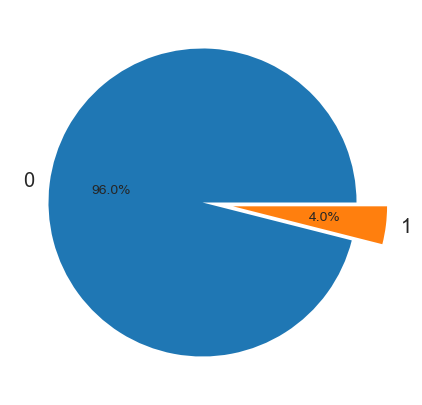

In [466]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(data_df['TARGET'].value_counts(), explode=explode, labels=class_names, autopct='%1.1f%%');

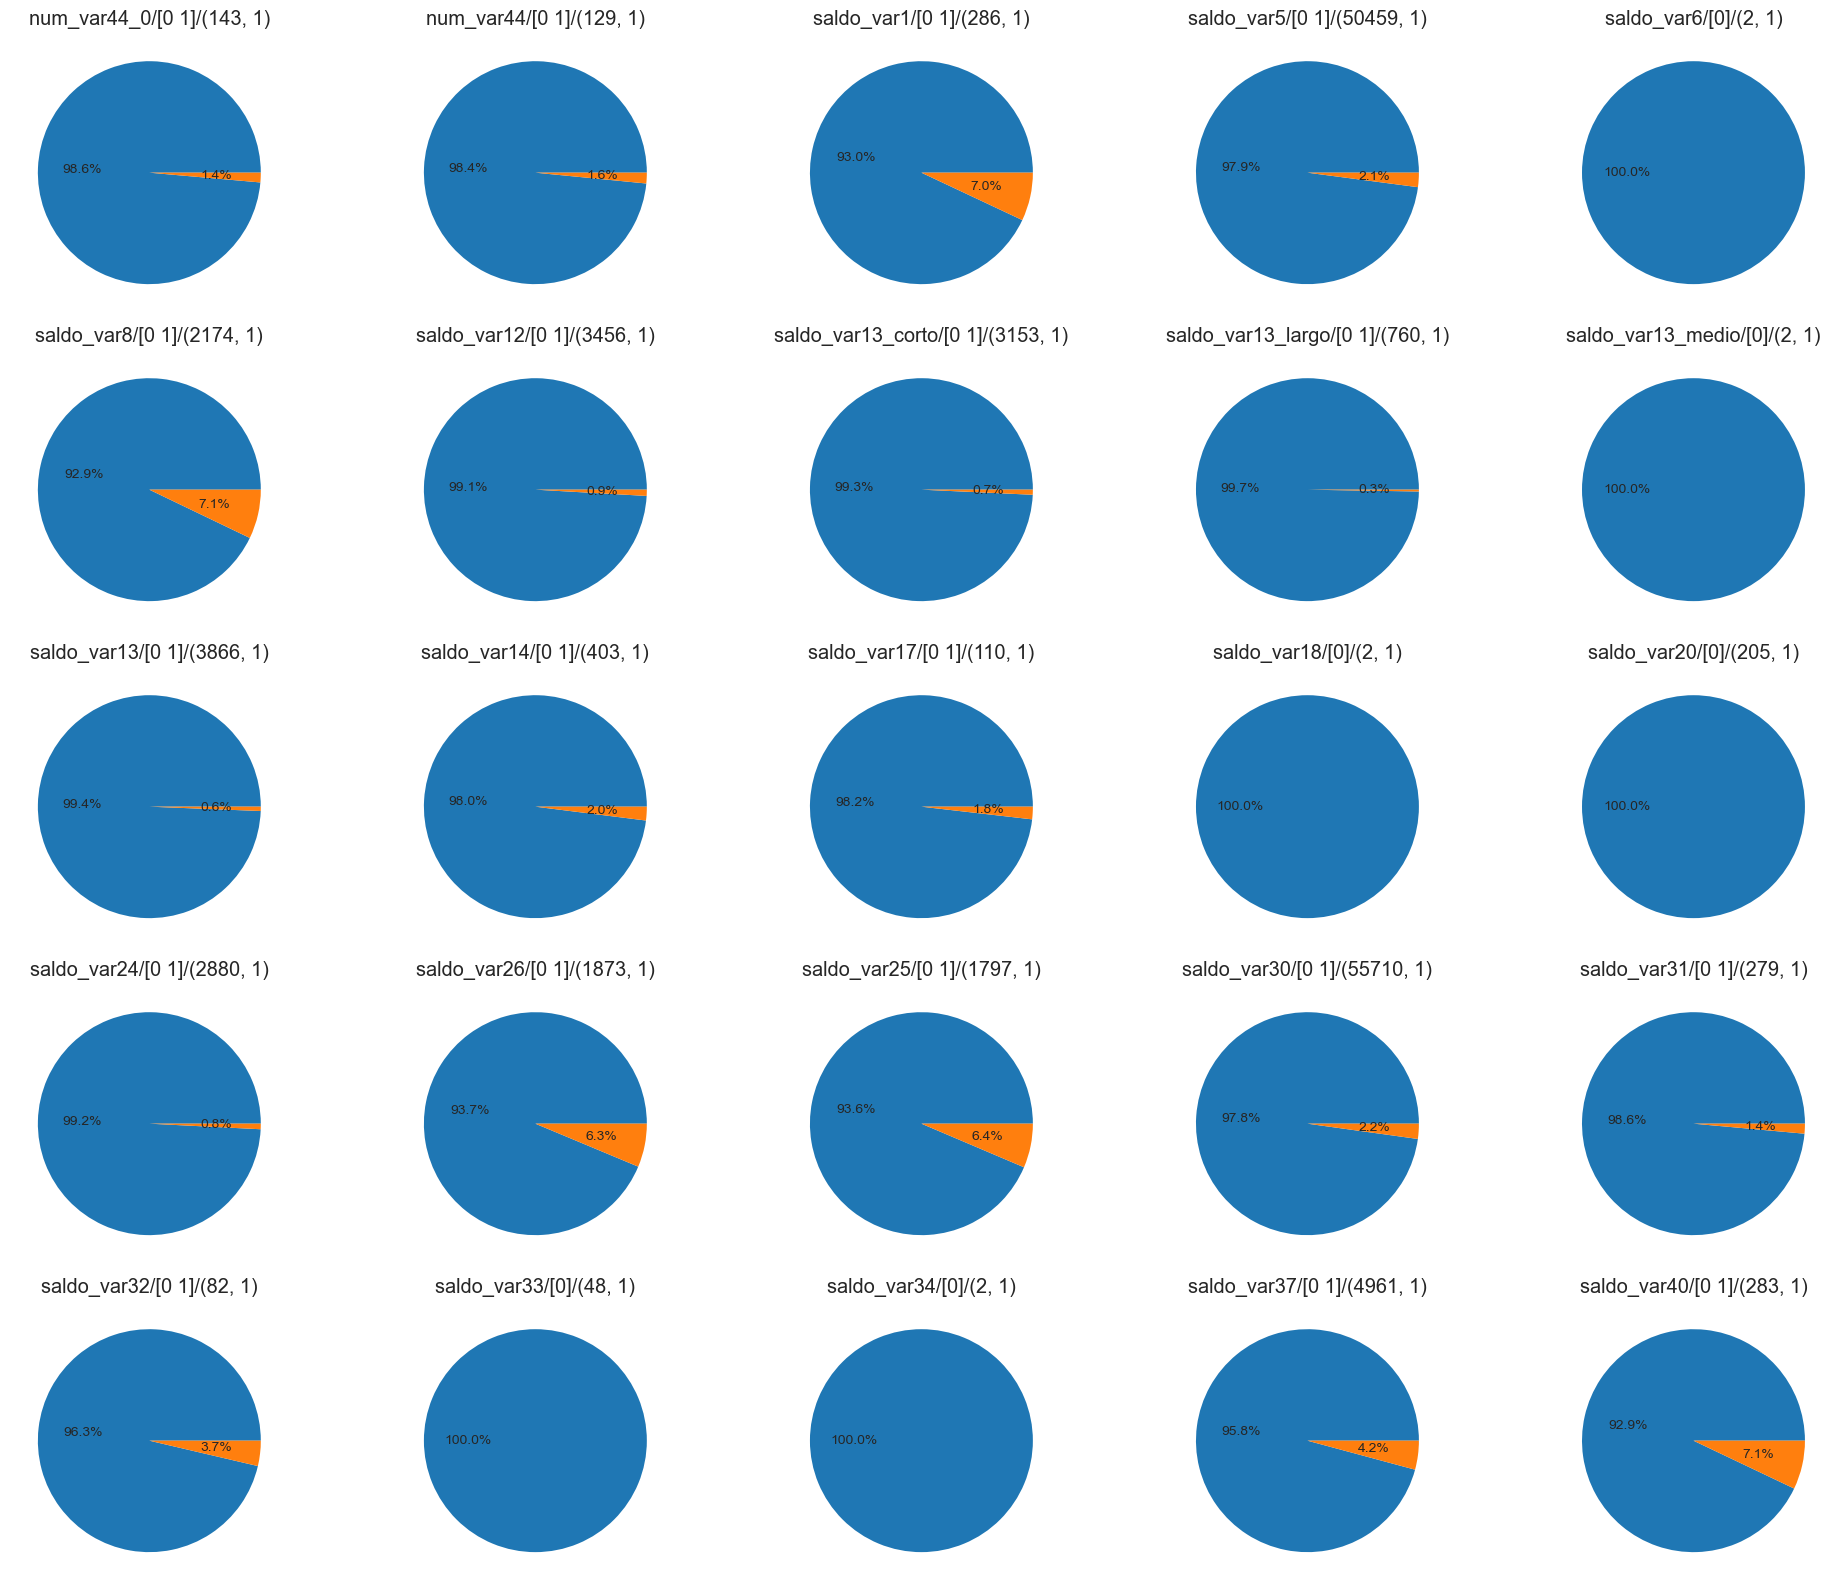

In [468]:
fig, axes = plt.subplots(5,5, figsize =(20,16))
axes = axes.ravel()
for count, col in enumerate(num_cols[from_range:to_range]):
    ax = axes[count]
    tmp_df= labels[feature_df[col]!=0]
    u_title= tmp_df['TARGET'].unique()
    shape = tmp_df.shape
    ax.pie(tmp_df['TARGET'].value_counts(), autopct='%1.1f%%');
    ax.set_title(f'{col}/{u_title}/{shape}')

plt.tight_layout()

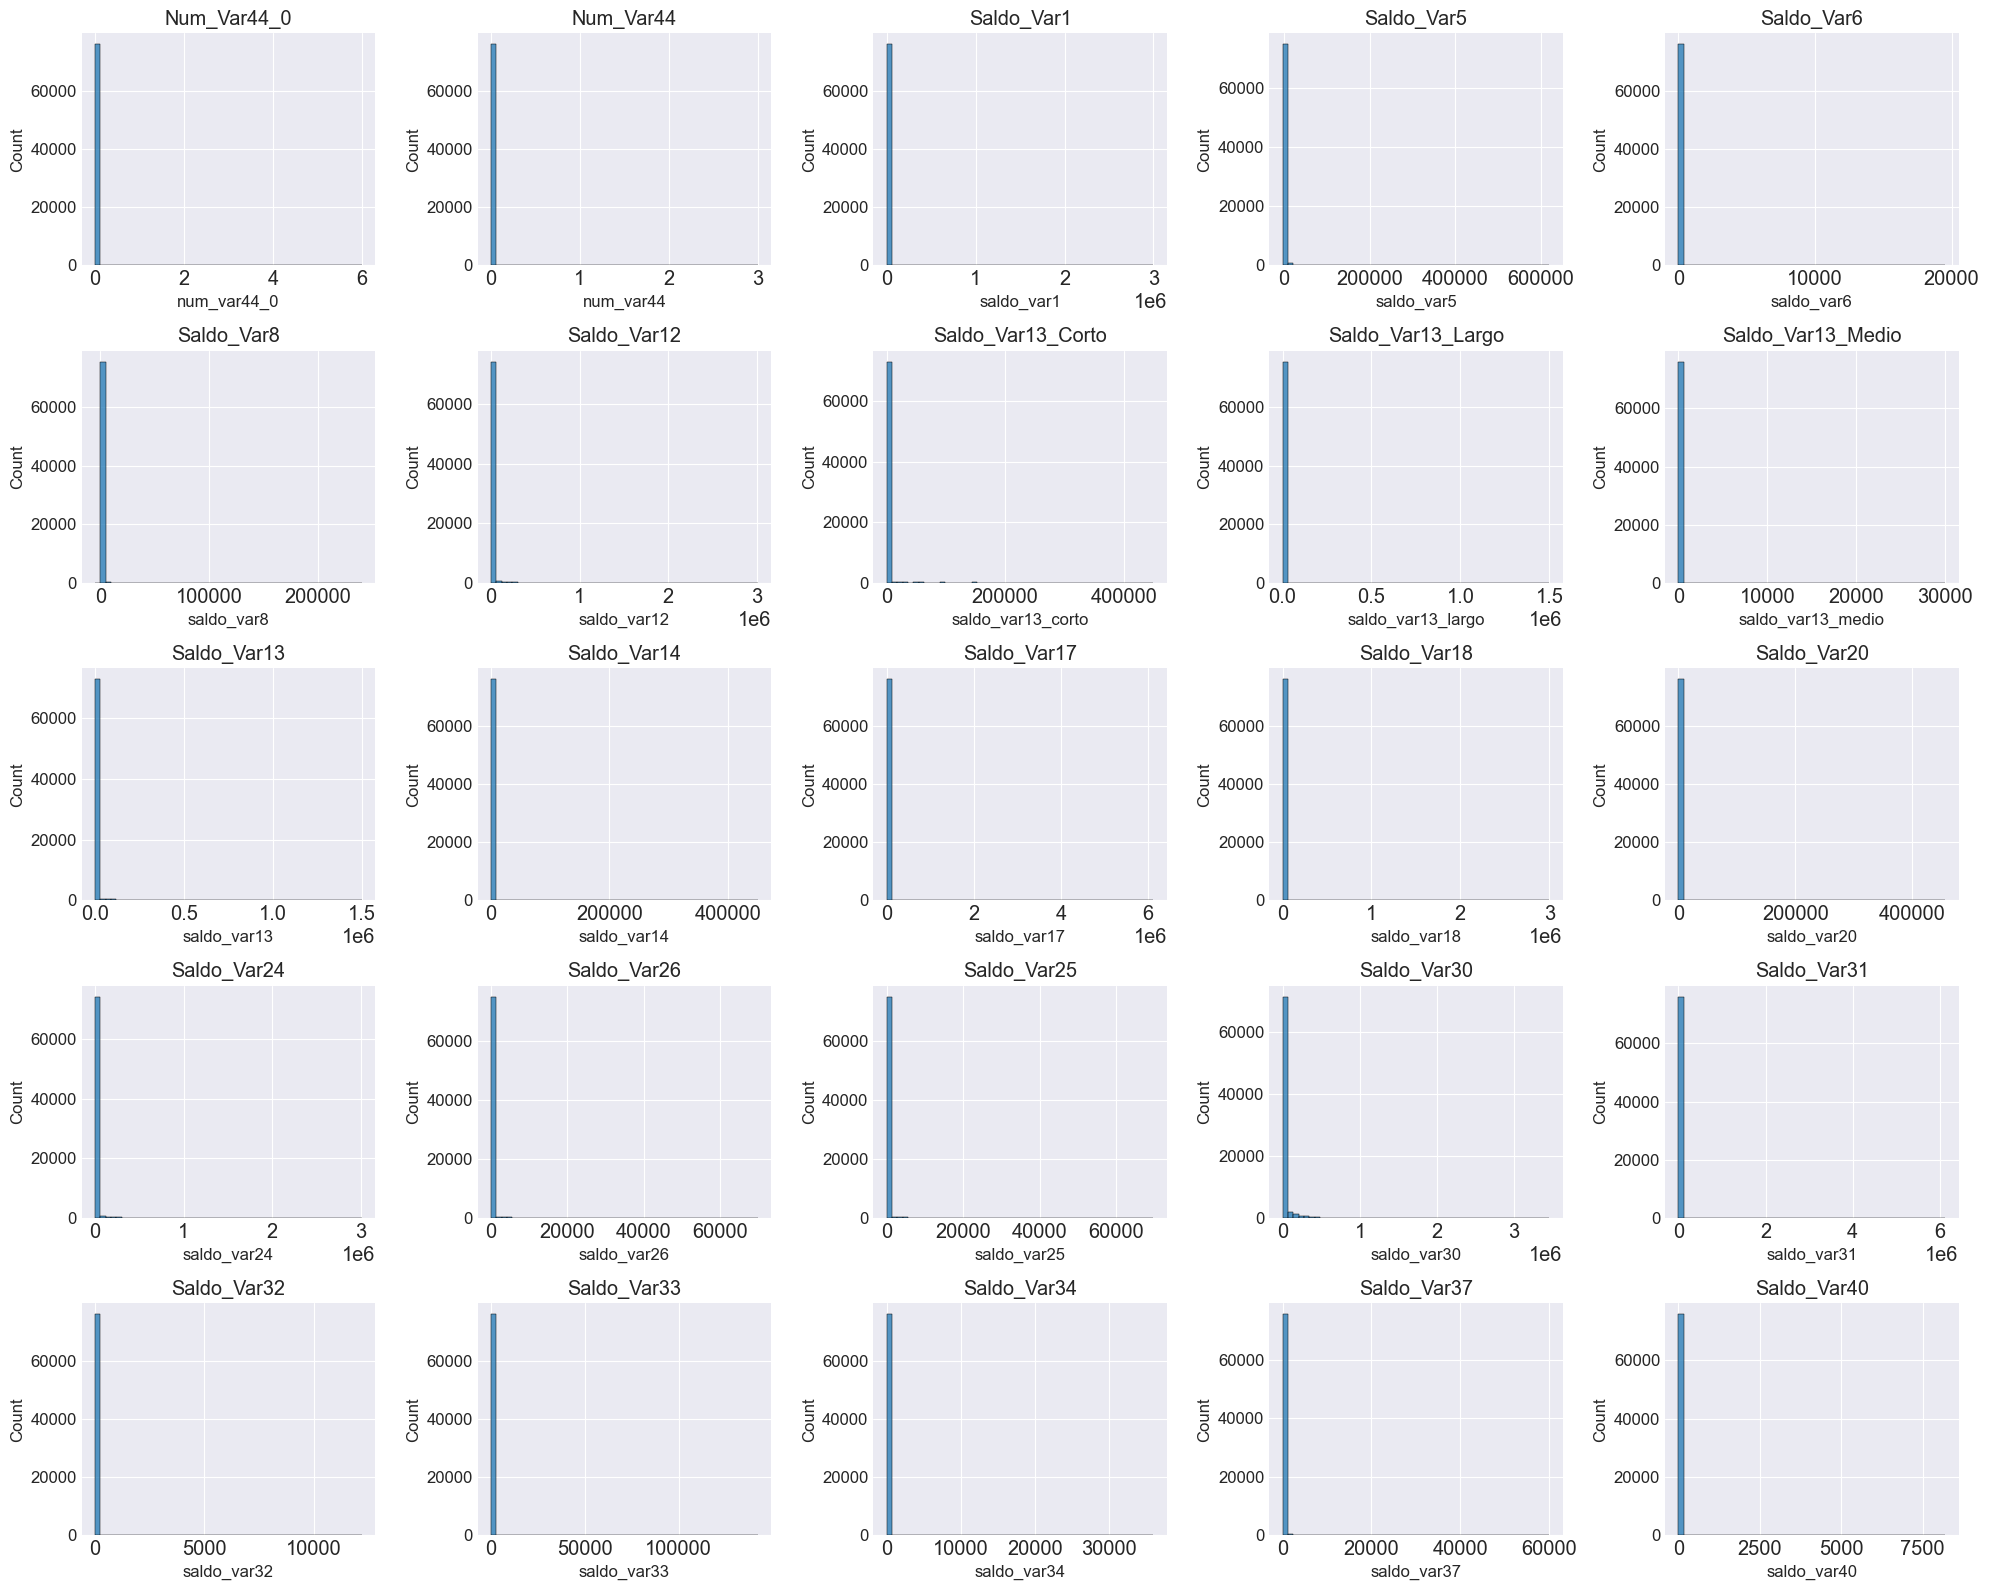

In [469]:
fig, axes = plt.subplots(5,5, figsize =(20,16))

axes = axes.ravel()

for count, col in enumerate(num_cols[from_range:to_range]):

    ax = axes[count]
    
    sns.histplot(feature_df, x=col, ax=ax, bins=50)

    ax.set_title(col.title())

plt.tight_layout()

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


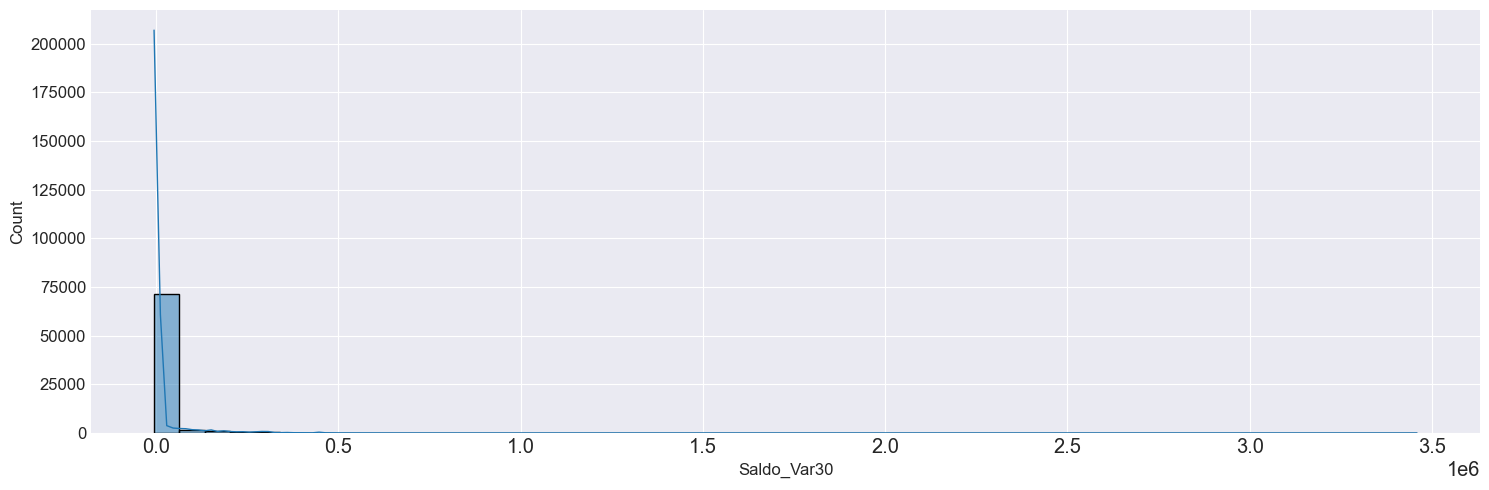

In [448]:
col = 'saldo_var30'

tmp_df=feature_df[col].copy()
tmp_df[col] = np.log1p(tmp_df)
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(feature_df,x=col, ax=ax,kde=True, bins=50);
ax.set_xlabel(col.title())
plt.tight_layout()

In [308]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    labels,
                                                    stratify=labels,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'feature' is not defined

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train) # alwyas fit on train data

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train.mean(), X_train.max(), X_train.min(), X_test.mean(), X_test.max(), X_test.min())

In [ ]:
clf = xgb.XGBClassifier(tree_method = 'hist', 
                        random_state = RANDOM_STATE, 
                        n_jobs = 16 )
clf

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc= accuracy_score(y_test, y_pred)

acc

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred=y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=class_names)
disp.plot(cmap= plt.cm.Blues, colorbar=False)
plt.grid(False)
plt.show()

In [ ]:
params = {
    'n_estimators'       : [100, 500, 1000],  #number of weak Trees
    'max_depth'          : [3, 8, 10, 20, 50], #max_depth, we saw 10 was best
    'learning_rate'      : [0.01, 0.1, 0.2, 0.3],
    'subsample'          : np.arange(0.5, 1.0, 0.1), 
    'colsample_bytree'  : np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel' : np.arange(0.4, 1.0, 0.1)
   
    
}

xgc = xgb.XGBClassifier(tree_method = 'hist', 
                        random_state = RANDOM_STATE, 
                        n_jobs = 16,
                        verbosity=1)

clf = RandomizedSearchCV(estimator=xgc, 
                         param_distributions=params, 
                         scoring='accuracy', 
                         n_iter=10, 
                         verbose=1)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)